## Feature Selections and model prediction

Apply PCA, manifold learning and k-means clustering to do feature selection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D 
from time import time
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs

In [ ]:
import tensorflow

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


### Plotting first two components

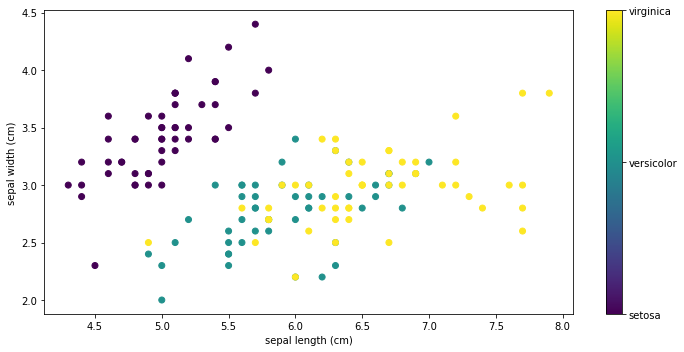

In [4]:
x_index = 0
y_index = 1
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.figure(figsize=(10, 5))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.show()

## 2D Plotting with PCA

In [5]:
pca = PCA(n_components=2).fit_transform(iris.data)

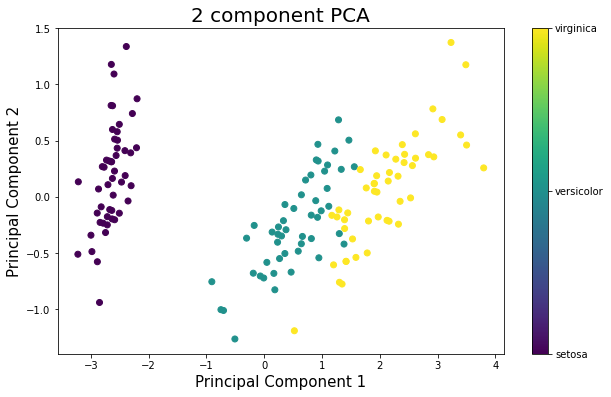

In [6]:
plt.figure(figsize=(10, 6))
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.scatter(pca[:, 0], pca[:, 1], c=iris.target)
plt.colorbar(ticks=[0, 1, 2],format=formatter)
plt.title('2 component PCA', fontsize = 20)
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.show()

## 2D plotting with t-SNE

In [7]:
tsne = TSNE(n_components=2, n_iter=1000).fit_transform(iris.data)

/Users/brittt/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/brittt/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


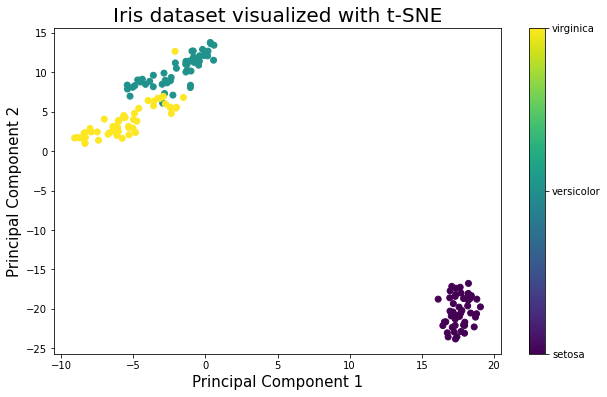

In [8]:
plt.figure(figsize=(10, 6))
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.scatter(tsne[:, 0], tsne[:, 1], c=iris.target)
plt.colorbar(ticks=[0, 1, 2],format=formatter)
plt.title('Iris dataset visualized with t-SNE', fontsize = 20)
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.show()

## k-means clustering

In [9]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

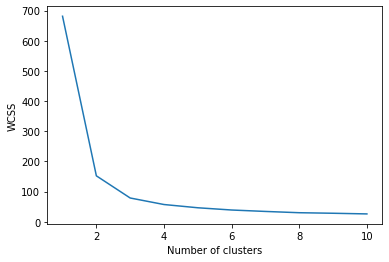

In [10]:
# Find the optimal number of clusters for k-means clustering
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

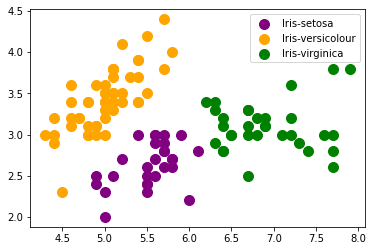

In [12]:
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

plt.legend()